# Model Benchmarking

This notebook will perform exploration via model and model hyperparameter searching of possible shallow models using SKLearn built in algorithms.

I use data constructed by Feature_Engineering.ipynb and model searching functionality from SKL_search.py 

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_context('talk')
import matplotlib.pyplot as plt
import warnings
from SKL_search import *
warnings.filterwarnings("ignore")

In [31]:
#untie local dependency
import os
cwd = os.getcwd().split('\\')
local_repo_path = '\\'.join(cwd[:-1])
raw_data_path = local_repo_path + r'\data\raw'
processed_data_path = local_repo_path + '\data\processed'
feature_path = local_repo_path + r'\\data\\features'

# Choose and load feature set to benchmark

In [32]:
output_feature_fname = 'Lookback10'
sj_feature_train = pd.read_csv(feature_path + r'\\sj_train_' + output_feature_fname + '.csv', index_col=0)
sj_feature_test = pd.read_csv(feature_path + r'\\sj_test_' + output_feature_fname + '.csv', index_col=0)
iq_feature_train = pd.read_csv(feature_path + r'\\iq_train_' + output_feature_fname + '.csv', index_col=0)
iq_feature_test = pd.read_csv(feature_path + r'\\iq_test_' + output_feature_fname + '.csv', index_col=0)

In [33]:
from sklearn.model_selection import train_test_split
X_tr_sj, X_val_sj, Y_tr_sj, Y_val_sj = train_test_split(sj_feature_train.drop('total_cases', axis = 1), sj_feature_train['total_cases'], test_size = 0.05, random_state = 4)
X_tr_iq, X_val_iq, Y_tr_iq, Y_val_iq = train_test_split(iq_feature_train.drop('total_cases', axis = 1), iq_feature_train['total_cases'], test_size = 0.05, random_state = 4)

In [34]:
X_tr_sj.head()

,var1(t-10),var2(t-10),var3(t-10),var4(t-10),var5(t-10),var1(t-9),var2(t-9),var3(t-9),var4(t-9),var5(t-9),...,var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1)
148,-0.962313,-1.033031,-0.557427,-0.500000,0.133742,-0.107339,-0.131756,-0.089084,-0.090616,0.040452,...,-0.797862,-0.821185,-0.404288,-1.000000,-0.221996,-1.153077,-1.227596,-0.649311,-1.000000,-0.261864
621,-0.631218,-0.624390,-0.667688,-0.500000,-0.133839,-0.804988,-0.820627,-0.961715,-1.000000,-0.179855,...,-0.714540,-0.743136,-0.196018,-0.272727,-0.443178,-0.523229,-0.543554,-0.422665,-0.500000,-0.473370
585,-0.039194,-0.039582,0.692190,0.227273,-0.510605,0.062766,0.075819,0.539051,1.000000,-0.479789,...,0.246403,0.249199,0.385911,0.000000,0.019901,0.360422,0.355122,0.588055,0.500000,0.122671
405,0.064958,0.050174,-0.232772,0.227273,0.493971,-0.115938,-0.114843,-0.196018,-0.500000,0.369460,...,-0.487598,-0.490592,-0.287902,-0.272727,-0.133839,-0.564342,-0.575889,-0.269525,-0.772727,-0.179855
338,0.265040,0.265923,-0.183767,0.000000,0.549533,0.226668,0.210174,0.232772,0.500000,0.649256,...,0.250788,0.234704,0.153139,0.227273,1.012287,0.536385,0.495610,0.784074,0.727273,0.994039


In [35]:
X_tr_iq.head()

,var1(t-10),var2(t-10),var3(t-10),var4(t-10),var5(t-10),var1(t-9),var2(t-9),var3(t-9),var4(t-9),var5(t-9),...,var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1)
359,0.023979,0.030064,-0.536296,0.285714,0.086156,0.386099,0.373969,0.726331,0.142857,0.003098,...,-0.862207,-0.933456,0.574815,-1.642857,-0.406533,0.144917,0.173052,0.726331,0.285714,-0.440512
434,-0.373588,-0.379102,0.305455,-0.642857,-0.272075,-0.464639,-0.497892,-0.182760,-0.642857,-0.214033,...,0.470895,0.446563,-0.199595,0.142857,0.364035,0.517463,0.510357,-0.132255,-0.071429,0.471155
506,0.164379,0.162053,0.305455,0.571429,1.254148,0.282537,0.281577,1.450236,0.857143,1.109742,...,1.299392,1.185701,1.029361,0.071429,0.270676,1.479409,1.344088,2.494007,0.500000,0.175349
143,-0.441008,-0.426031,0.877846,1.214286,0.971471,-0.889314,-0.933456,1.079866,0.857143,0.839335,...,0.404865,0.411366,0.069765,1.000000,0.086156,0.517463,0.506691,3.302088,0.357143,0.003098
462,0.453519,0.453896,-0.233265,-0.214286,0.175349,0.333275,0.343171,0.271785,-0.214286,0.086156,...,0.325630,0.335105,0.574815,0.500000,-0.366418,0.213032,0.225848,0.549563,0.500000,-0.406533


# Benchmark SJ city

# SKLearn broad model search

In [36]:
from sklearn.ensemble import (ExtraTreesRegressor, RandomForestRegressor, 
                              AdaBoostRegressor, GradientBoostingRegressor)
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPRegressor

In [37]:
models1 = { 
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'SVR': SVR()
    #'NNRegressor': neighbors.KNeighborsRegressor()
}

params1 = {  
    'RandomForestRegressor': { 'n_estimators': [100,100], 'max_depth':[5,10]},
    'GradientBoostingRegressor': { 'n_estimators': [50, 100,150], 'max_features': ['sqrt','log2'] },
    'SVR': [
        {'kernel': ['linear'], 'C': [0.05, 0.01], 'degree':[1], 'epsilon':[0.2, 0.5, 1]}],
    'LinearRegression': {'n_jobs':[-1]}
    #'NNRegressor': {'n_neighbors':[125]}
    
}

In [38]:
sj_helper = EstimatorSelectionHelper(models1, params1)
sj_helper.fit(X_tr_sj, Y_tr_sj, scoring='neg_mean_absolute_error', cv = 2)

Running GridSearchCV for RandomForestRegressor.
Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:    2.6s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed:    3.9s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    4.5s finished


Running GridSearchCV for GradientBoostingRegressor.
Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done   8 out of  12 | elapsed:    2.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    3.0s finished


Running GridSearchCV for SVR.
Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done   8 out of  12 | elapsed:    2.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    2.9s finished


In [22]:
sj_skl_models = sj_helper.score_summary(sort_by='min_score')
sj_skl_models

,estimator,min_score,mean_score,max_score,std_score,C,degree,epsilon,kernel,max_depth,max_features,n_estimators
11,SVR,-22.263,-21.6819,-21.1008,0.581099,0.05,1,0.5,linear,NaN,NaN,NaN
12,SVR,-22.2685,-21.6777,-21.0868,0.590837,0.05,1,1,linear,NaN,NaN,NaN
10,SVR,-22.2722,-21.6943,-21.1164,0.577925,0.05,1,0.2,linear,NaN,NaN,NaN
15,SVR,-22.4951,-21.9608,-21.4265,0.534274,0.01,1,1,linear,NaN,NaN,NaN
14,SVR,-22.4988,-21.976,-21.4531,0.522861,0.01,1,0.5,linear,NaN,NaN,NaN
13,SVR,-22.5047,-21.9855,-21.4663,0.519229,0.01,1,0.2,linear,NaN,NaN,NaN
9,GradientBoostingRegressor,-23.4302,-22.1045,-20.7788,1.32566,NaN,NaN,NaN,NaN,NaN,log2,150
6,GradientBoostingRegressor,-23.9257,-22.1894,-20.4531,1.73629,NaN,NaN,NaN,NaN,NaN,sqrt,150
7,GradientBoostingRegressor,-24.3621,-22.8552,-21.3483,1.50692,NaN,NaN,NaN,NaN,NaN,log2,50
5,GradientBoostingRegressor,-24.4376,-22.1585,-19.8794,2.27909,NaN,NaN,NaN,NaN,NaN,sqrt,100


In [23]:
def fit_and_predict(train, test, mod):
    mod.fit(train.drop('total_cases', axis = 1), train['total_cases'])
    test_preds = mod.predict(test.drop(['city', 'year', 'weekofyear'], axis = 1))
    train_preds = mod.predict(train.drop('total_cases', axis = 1))
    fig, ax = plt.subplots(figsize = (20,10))
    train_error = np.round(mean_absolute_error(train_preds, train['total_cases']),1)
    pd.DataFrame(train['total_cases']).reset_index(drop = True).plot(ax = ax)
    pd.DataFrame(test_preds).set_index(np.arange(len(train), len(train)+ len(test_preds))).plot(ax = ax)
    pd.DataFrame(train_preds).plot(ax = ax)
    ax.legend(labels = ['True', 'Predicted', 'Fitted'])
    ax.set_title('Mean train error: ' + str(train_error))
    return(mod, train_preds, test_preds)

In [54]:
SVR_mod = SVR(C = 0.05, degree = 1, epsilon = 0.2, kernel = 'linear')
GB_mod = GradientBoostingRegressor(n_estimators = 35, max_depth = 3, max_features = 'sqrt')
RF_mod = RandomForestRegressor(n_estimators = 50, max_depth = 10, max_features = 'sqrt')
NN_mod = neighbors.KNeighborsRegressor(n_neighbors = 2)
MLP_NN = MLPRegressor((100), max_iter = 1000,learning_rate = 'invscaling', activation = 'relu')

# Fit and predict with Gradient Boosted Regressor for sj

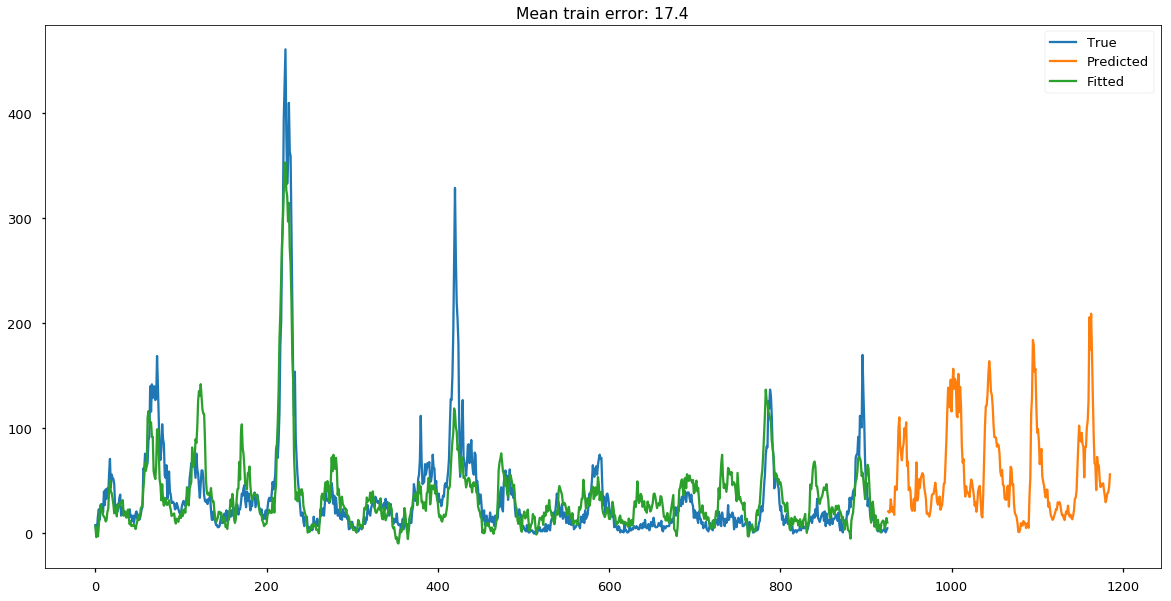

In [52]:
sj_GB_mod, sj_GB_fitted_vals, sj_GB_test_preds = fit_and_predict(sj_feature_train, sj_feature_test, MLP_NN)

# Fit and predict with Gradient Boosted Regressor for iq

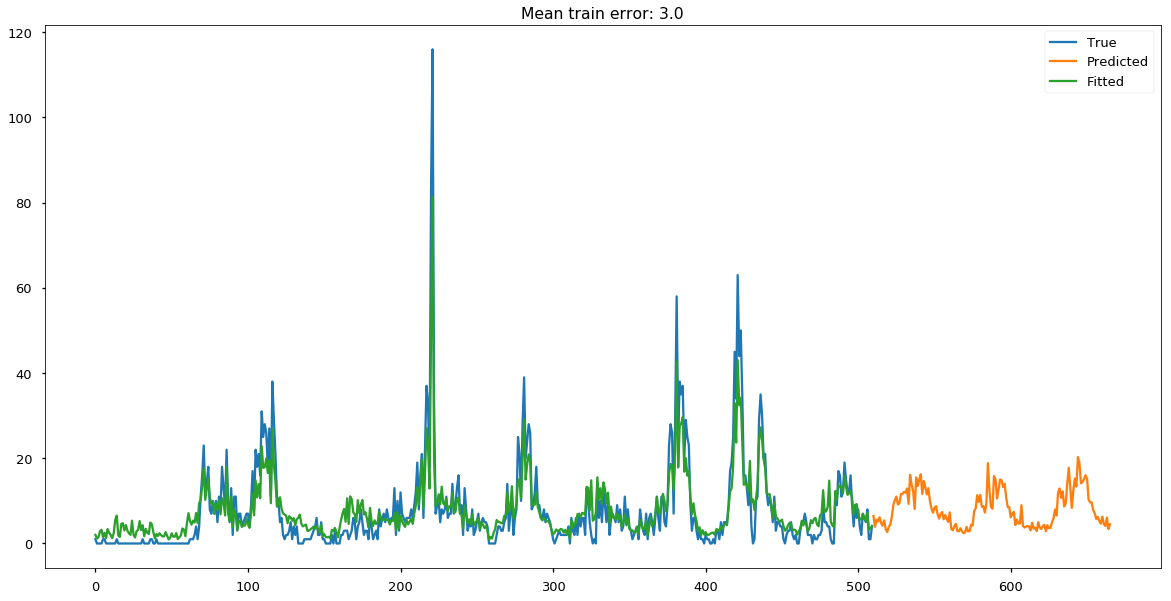

In [57]:
iq_GB_mod, iq_GB_fitted_vals, iq_GB_test_preds = fit_and_predict(iq_feature_train, iq_feature_test, RF_mod)

# Fit and predict with SVR for sj

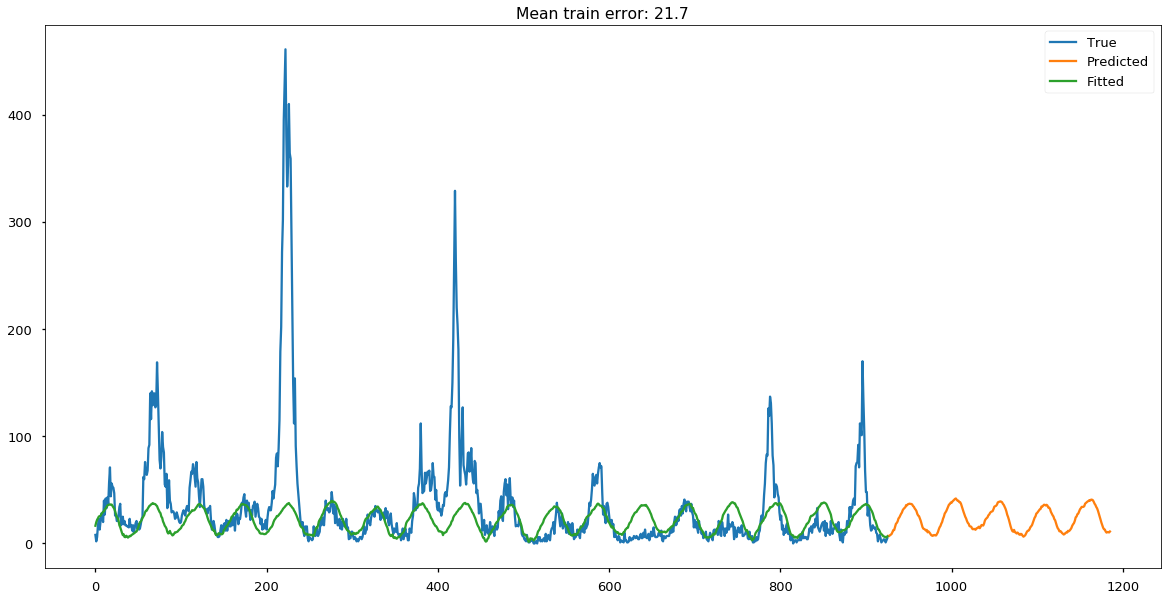

In [27]:
sj_SVR_mod, sj_SVR_fitted_vals, sj_SVR_test_preds = fit_and_predict(sj_feature_train, sj_feature_test, SVR_mod)

# Fit and predict with SVR for iq

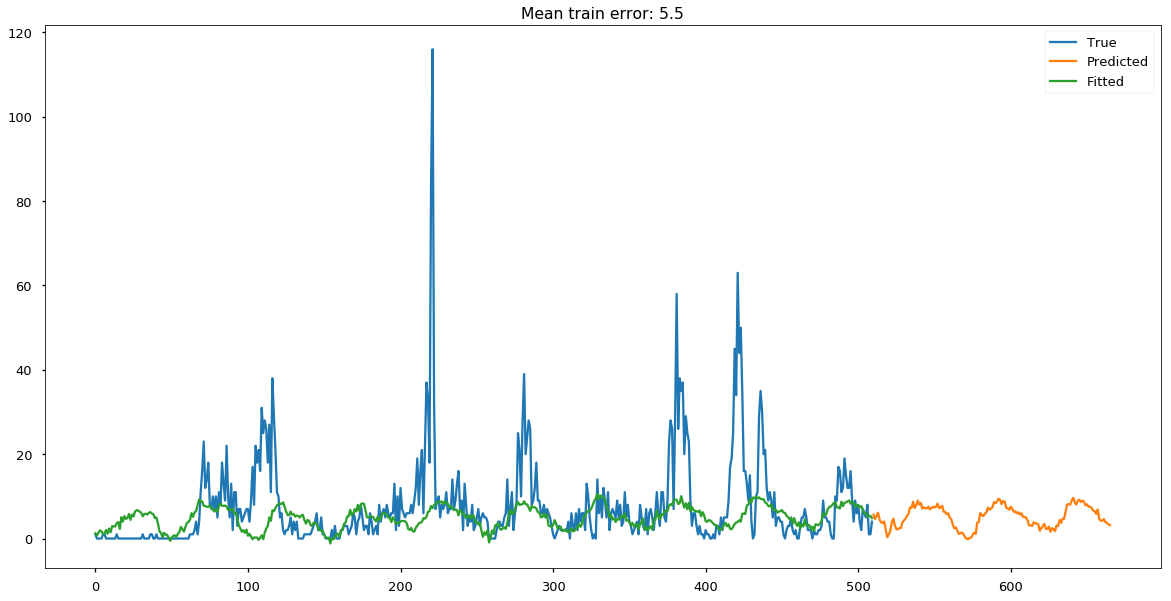

In [28]:
iq_SVR_mod, iq_SVR_fitted_vals, iq_SVR_test_preds = fit_and_predict(iq_feature_train, iq_feature_test, SVR_mod)

# Poisson Regression using Statsmodels

# Negative Binomial GLM using Statsmodels

In [58]:
import statsmodels.api as sm
from statsmodels.tools import eval_measures
import statsmodels.formula.api as smf

In [59]:
X_tr_sj.columns = [str(i) if not i.isdigit() else str('Num') + str(i) for i in list(X_tr_sj.columns)]
X_val_sj.columns = [str(i) if not i.isdigit() else str('Num') + str(i) for i in list(X_tr_sj.columns)]
sj_feature_test.columns = [str(i) if not i.isdigit() else str('Num') + str(i) for i in list(sj_feature_test.columns)]

In [60]:
formula = ' + '.join([str(i) if not i.isdigit() else str('Num') + str(i) for i in list(X_tr_sj.columns)])
formula = 'y ~ ' + formula
X_tr_sj['y'] = Y_tr_sj
X_val_sj['y'] = Y_val_sj

In [63]:
formula

'y ~ var1(t-10) + var2(t-10) + var3(t-10) + var4(t-10) + var5(t-10) + var1(t-9) + var2(t-9) + var3(t-9) + var4(t-9) + var5(t-9) + var1(t-8) + var2(t-8) + var3(t-8) + var4(t-8) + var5(t-8) + var1(t-7) + var2(t-7) + var3(t-7) + var4(t-7) + var5(t-7) + var1(t-6) + var2(t-6) + var3(t-6) + var4(t-6) + var5(t-6) + var1(t-5) + var2(t-5) + var3(t-5) + var4(t-5) + var5(t-5) + var1(t-4) + var2(t-4) + var3(t-4) + var4(t-4) + var5(t-4) + var1(t-3) + var2(t-3) + var3(t-3) + var4(t-3) + var5(t-3) + var1(t-2) + var2(t-2) + var3(t-2) + var4(t-2) + var5(t-2) + var1(t-1) + var2(t-1) + var3(t-1) + var4(t-1) + var5(t-1)'

In [61]:
model = smf.glm(formula=formula,
                data=X_tr_sj,
                family=sm.families.NegativeBinomial(alpha = 1e-8))
model = model.fit()

predictions_sj = model.predict(X_val_sj).astype(int)
print ("cv error:", mean_absolute_error(predictions_sj, Y_val_sj))

pred_train_sj = model.predict(X_tr_sj).astype(int)
print ("train error:", mean_absolute_error(pred_train_sj, Y_tr_sj))

PatsyError: Error evaluating factor: NameError: name 'var3' is not defined
    y ~ var1(t-10) + var2(t-10) + var3(t-10) + var4(t-10) + var5(t-10) + var1(t-9) + var2(t-9) + var3(t-9) + var4(t-9) + var5(t-9) + var1(t-8) + var2(t-8) + var3(t-8) + var4(t-8) + var5(t-8) + var1(t-7) + var2(t-7) + var3(t-7) + var4(t-7) + var5(t-7) + var1(t-6) + var2(t-6) + var3(t-6) + var4(t-6) + var5(t-6) + var1(t-5) + var2(t-5) + var3(t-5) + var4(t-5) + var5(t-5) + var1(t-4) + var2(t-4) + var3(t-4) + var4(t-4) + var5(t-4) + var1(t-3) + var2(t-3) + var3(t-3) + var4(t-3) + var5(t-3) + var1(t-2) + var2(t-2) + var3(t-2) + var4(t-2) + var5(t-2) + var1(t-1) + var2(t-1) + var3(t-1) + var4(t-1) + var5(t-1)
                                                                                                 ^^^^^^^^^